## 1. What is a Support Vector Machine (SVM)?  
A **Support Vector Machine (SVM)** is a supervised machine learning algorithm primarily used for classification (and sometimes regression) tasks. Its main objective is to find the best possible boundary (hyperplane) that separates classes of data with the maximum margin, effectively distinguishing between different categories of input data.

## 2. Define the following terms in the context of SVM:  
- **Hyperplane:** A hyperplane is a decision boundary that divides the feature space into different classes. For a two-dimensional space, it's a line; for higher dimensions, it becomes a plane or a higher-dimensional analog.
- **Support Vectors:** These are the data points that are closest to the hyperplane. They are pivotal in defining the position and orientation of the hyperplane, as the margin is measured based on these points.
- **Margin:** The margin is the distance between the hyperplane and the nearest support vectors from each class. A larger margin is generally preferred, indicating a clearer separation between classes.

## 3. Why does SVM aim to maximize the margin? How does it affect model generalization?  
SVM seeks to maximize the margin because a larger margin between the classes typically leads to better generalization ability. Maximizing the margin reduces the risk of overfitting and enables the model to perform well on unseen data by ensuring that the decision boundary is robust and less sensitive to slight variations in the data.

## 4. What is the difference between a hard margin and a soft margin in SVM?  
- **Hard Margin:** Assumes all data is linearly separable without error. No misclassification is allowed, which can be too strict for real-world, noisy data.
- **Soft Margin:** Allows for some misclassification or violations of the margin. It introduces a penalty for misclassified points, providing flexibility to handle overlapping or noisy datasets.

## 5. Explain the concept of the kernel trick. Why is it useful in SVM?  
The **kernel trick** is a method that allows SVMs to operate in a high-dimensional (possibly infinite-dimensional) feature space without explicitly transforming the data. It computes the inner products in this space efficiently using kernel functions (e.g., RBF, polynomial). This is useful for solving problems where data is not linearly separable in the original feature space.

## 6. Differentiate between the following kernel types:

| Kernel Type | Description | Example Use |
| ----------- | ----------- | ----------- |
| Linear      | No transformation; fits a linear hyperplane in original space. | Text classification, where features are already linearly separable. |
| Polynomial | Maps input to a higher-dimensional space using polynomial functions. Captures interaction of features up to a certain degree. | Image processing, tasks with polynomial relationships between variables. |
| RBF (Radial Basis Function) | Maps inputs to an infinite-dimensional space; handles complex, non-linear boundaries. | Bioinformatics, where class boundaries are highly non-linear. |

## 7. What do the hyperparameters C and gamma control in an SVM model?
- **C (Regularization Parameter):** Controls the trade-off between maximizing the margin and minimizing classification errors. A low C increases margin but allows more misclassifications; a high C tries to classify all points correctly but may lead to overfitting.
- **Gamma:** Controls the influence of single training examples in RBF/poly kernels. Low gamma means points far from the hyperplane are considered; high gamma means only those close to the hyperplane influence the model.

## 8. Give two real-world use cases of SVM and briefly explain how SVM is useful in those scenarios.
- **Email Spam Detection:** SVMs can classify emails as spam or not-spam by learning from labeled examples of both, efficiently handling large feature sets like words and phrases.
- **Handwritten Digit Recognition:** SVMs can classify images of handwritten digits (e.g., MNIST dataset) by finding optimal boundaries in high-dimensional pixel spaces, even when digits are not linearly separable.

## 9. When would you prefer to use:
- **Linear kernel:** When the data is (almost) linearly separable or the number of features is much higher than the number of data points (e.g., text data).
- **RBF kernel:** When the data shows complex, non-linear relationships and cannot be separated by a straight line or hyperplane in the original feature space.

## 10. List two advantages and two disadvantages of using SVM.

| Advantages                        | Disadvantages      |
| ---------------------------------- | ----------------- |
| Effective in high-dimensional spaces; robust to overfitting (with proper regularization). | Not well-suited for very large datasets due to high computational cost. |
| Can model non-linear boundaries using kernels. | Performance drops if there’s significant class overlap or data noise. |

Sources


In [13]:
!pip install pandas seaborn matplotlib scikit-learn

In [14]:
import pandas as pd

data = pd.read_csv('Social_Network_Ads.csv')
print(data.head())


    User ID  Gender  Age  EstimatedSalary  Purchased
0  15624510    Male   19            19000          0
1  15810944    Male   35            20000          0
2  15668575  Female   26            43000          0
3  15603246  Female   27            57000          0
4  15804002    Male   19            76000          0


In [15]:
# checkout for null
print(data.isnull().sum())

# Get value counts for the target variable (Purchased)

print(data['Purchased'].value_counts())



User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64
Purchased
0    257
1    143
Name: count, dtype: int64


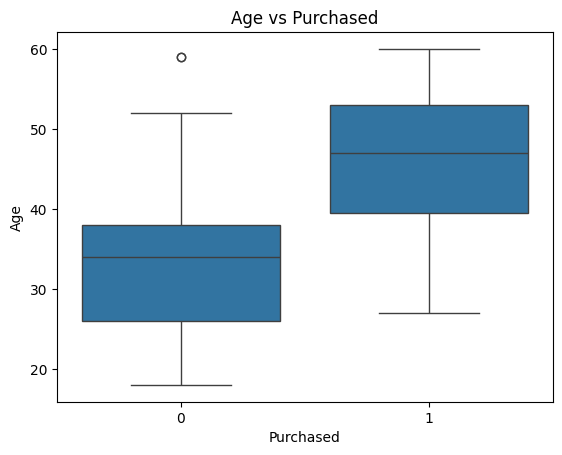

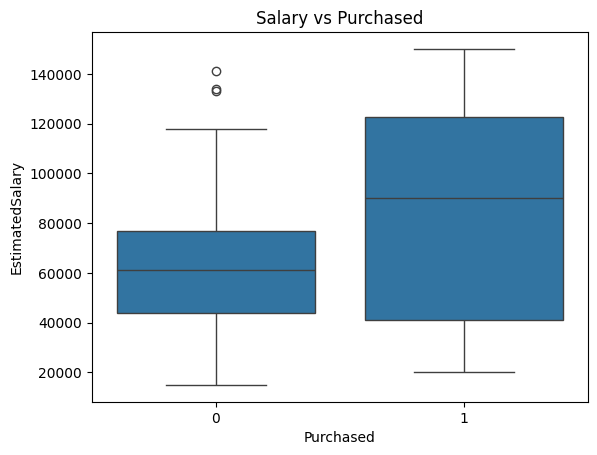

In [16]:
# Plot Age vs Purchased and Salary vs Purchased:
import matplotlib.pyplot as plt
import seaborn as sns

# Age vs Purchased
sns.boxplot(x='Purchased', y='Age', data=data)
plt.title('Age vs Purchased')
plt.show()

# Salary vs Purchased
sns.boxplot(x='Purchased', y='EstimatedSalary', data=data)
plt.title('Salary vs Purchased')
plt.show()


In [ ]:
# Q3. Apply preprocessing
	# •	Use only Age and EstimatedSalary as features:

X = data[['Age', 'EstimatedSalary']].values
y = data['Purchased'].values

	# •	Standardize the features:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X = sc.fit_transform(X)


In [18]:
# Q4. Split the dataset into training and testing sets (test size = 25%):

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=0)


In [19]:
# Q5. Train two SVM models
from sklearn.svm import SVC

# Model A: Linear kernel
clf_linear = SVC(kernel='linear', random_state=0)
clf_linear.fit(X_train, y_train)

# Model B: RBF kernel
clf_rbf = SVC(kernel='rbf', random_state=0)
clf_rbf.fit(X_train, y_train)


,C,1.0
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [20]:
# Q6. Compare their performance
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Linear SVM
y_pred_linear = clf_linear.predict(X_test)
print("Linear Kernel Accuracy:", accuracy_score(y_test, y_pred_linear))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_linear))
print("Classification Report:\n", classification_report(y_test, y_pred_linear))

# RBF SVM
y_pred_rbf = clf_rbf.predict(X_test)
print("RBF Kernel Accuracy:", accuracy_score(y_test, y_pred_rbf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rbf))
print("Classification Report:\n", classification_report(y_test, y_pred_rbf))


Linear Kernel Accuracy: 0.9
Confusion Matrix:
 [[66  2]
 [ 8 24]]
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.97      0.93        68
           1       0.92      0.75      0.83        32

    accuracy                           0.90       100
   macro avg       0.91      0.86      0.88       100
weighted avg       0.90      0.90      0.90       100

RBF Kernel Accuracy: 0.93
Confusion Matrix:
 [[64  4]
 [ 3 29]]
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.94      0.95        68
           1       0.88      0.91      0.89        32

    accuracy                           0.93       100
   macro avg       0.92      0.92      0.92       100
weighted avg       0.93      0.93      0.93       100



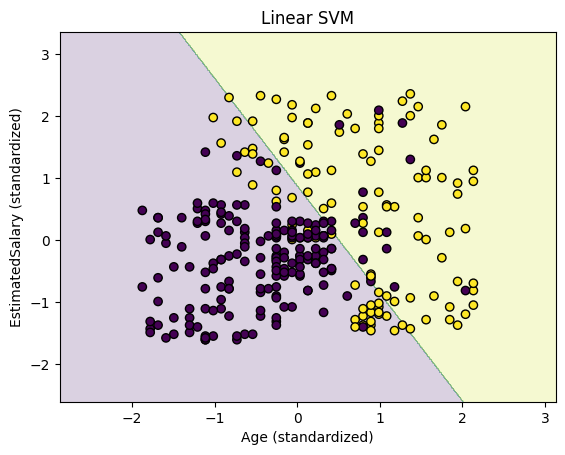

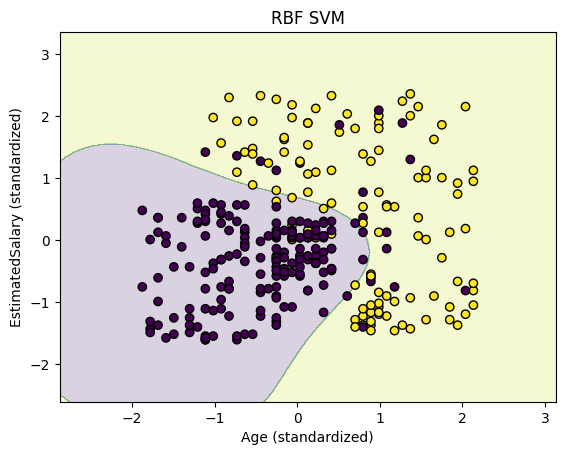

In [21]:
# Q7. Visualize the decision boundaries of both models
# Here’s an example using matplotlib and the meshgrid approach:
import numpy as np

def plot_decision_boundary(clf, X, y, title):
    h = 0.01
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(
        np.arange(x_min, x_max, h),
        np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.2)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k')
    plt.title(title)
    plt.xlabel('Age (standardized)')
    plt.ylabel('EstimatedSalary (standardized)')
    plt.show()

plot_decision_boundary(clf_linear, X_train, y_train, 'Linear SVM')
plot_decision_boundary(clf_rbf, X_train, y_train, 'RBF SVM')


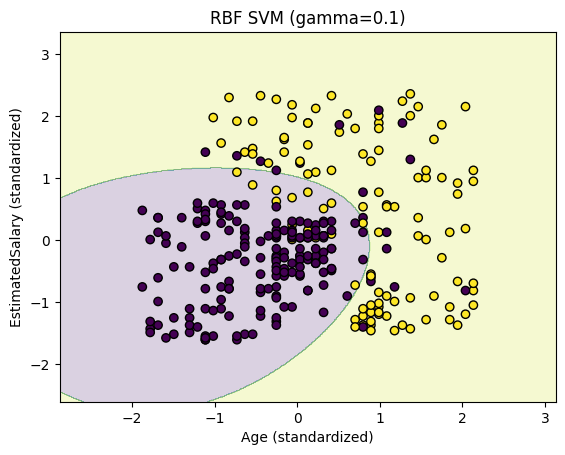

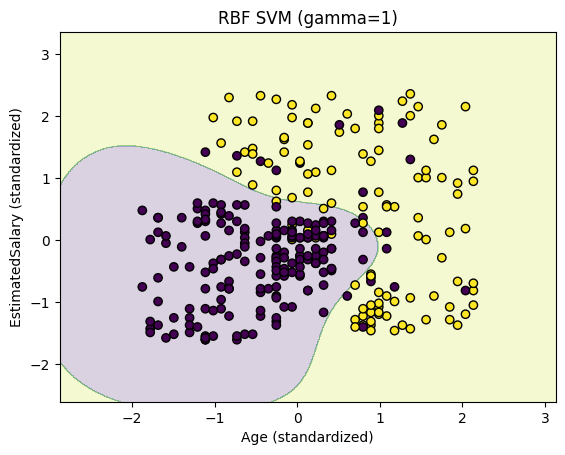

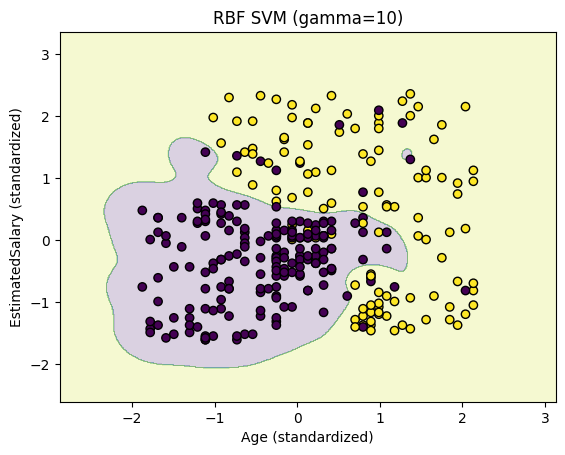

In [23]:
# Q8. Try changing the value of gamma and observe its effect
gamma_values = [0.1, 1, 10]
for gamma in gamma_values:
    clf = SVC(kernel='rbf', gamma=gamma)
    clf.fit(X_train, y_train)
    plot_decision_boundary(clf, X_train, y_train, f'RBF SVM (gamma={gamma})')
